In [6]:
#Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Reading the video
vidcap = cv2.VideoCapture('data/video_Trim.mp4')
success,image = vidcap.read()
count = 0
success = True
idx = 0

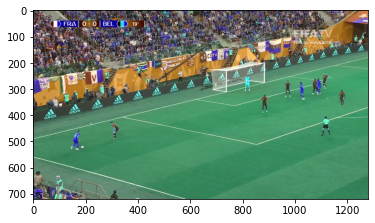

In [14]:
plt.imshow(image)

## converting the image

In [15]:
#converting into hsv image
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

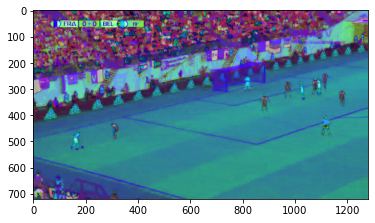

In [16]:
plt.imshow(hsv)

## Setting up the ranges of colors to identify the different classes

In [20]:
 #green range
lower_green = np.array([40,40, 40])
upper_green = np.array([70, 255, 255])
#blue range
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
#Red range
lower_red = np.array([0,31,255])
upper_red = np.array([176,255,255])
#white range
lower_white = np.array([0,0,0])
upper_white = np.array([0,0,255])

In [21]:
#Define a mask ranging from lower to uppper
mask = cv2.inRange(hsv, lower_green, upper_green)
#Do masking
res = cv2.bitwise_and(image, image, mask=mask)
#convert to hsv to gray
res_bgr = cv2.cvtColor(res,cv2.COLOR_HSV2BGR)
res_gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)

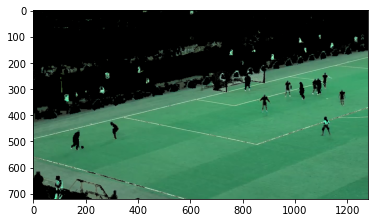

In [25]:
plt.imshow(res)

In [29]:
#Defining a kernel to do morphological operation in threshold #image to get better output.
kernel = np.ones((13,13),np.uint8)
thresh = cv2.threshold(res_gray,127,255,cv2.THRESH_BINARY_INV |  cv2.THRESH_OTSU)[1]
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

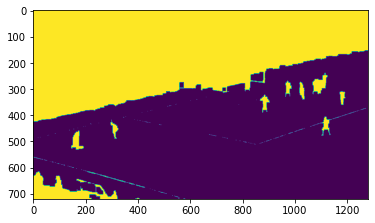

In [27]:
plt.imshow(thresh)

In [39]:
#find contours in threshold image     
contours = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[0]


In [40]:
prev = 0
font = cv2.FONT_HERSHEY_SIMPLEX

In [41]:
c = contours[0]

In [42]:
x,y,w,h = cv2.boundingRect(c)

In [46]:
w

5

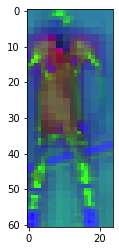

In [51]:
#Detect players
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if(h>=(1.5)*w):
        if(w>15 and h>= 15):
            idx = idx+1
            player_img = image[y:y+h,x:x+w]
            player_hsv = cv2.cvtColor(player_img,cv2.COLOR_BGR2HSV)
            plt.imshow(player_hsv)
            #If player has blue jersy
            mask1 = cv2.inRange(player_hsv, lower_blue, upper_blue)
            res1 = cv2.bitwise_and(player_img, player_img, mask=mask1)
            res1 = cv2.cvtColor(res1,cv2.COLOR_HSV2BGR)
            res1 = cv2.cvtColor(res1,cv2.COLOR_BGR2GRAY)
            nzCount = cv2.countNonZero(res1)
            #If player has red jersy
            mask2 = cv2.inRange(player_hsv, lower_red, upper_red)
            res2 = cv2.bitwise_and(player_img, player_img, mask=mask2)
            res2 = cv2.cvtColor(res2,cv2.COLOR_HSV2BGR)
            res2 = cv2.cvtColor(res2,cv2.COLOR_BGR2GRAY)
            nzCountred = cv2.countNonZero(res2)


            else:
                pass
    if((h>=1 and w>=1) and (h<=30 and w<=30)):
        player_img = image[y:y+h,x:x+w]

        player_hsv = cv2.cvtColor(player_img,cv2.COLOR_BGR2HSV)
        #white ball  detection
        mask1 = cv2.inRange(player_hsv, lower_white, upper_white)
        res1 = cv2.bitwise_and(player_img, player_img, mask=mask1)
        res1 = cv2.cvtColor(res1,cv2.COLOR_HSV2BGR)
        res1 = cv2.cvtColor(res1,cv2.COLOR_BGR2GRAY)
        nzCount = cv2.countNonZero(res1)

if(nzCount >= 20):
    #Mark blue jersy players as france
    cv2.putText(image, 'France', (x-2, y-2), font, 0.8, (255,0,0), 2, cv2.LINE_AA)
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),3)
else:
    pass
if(nzCountred>=20):
    #Mark red jersy players as belgium
    cv2.putText(image, 'Belgium', (x-2, y-2), font, 0.8, (0,0,255), 2, cv2.LINE_AA)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),3)
    
        if(nzCount >= 3):
            # detect football
            cv2.putText(image, 'football', (x-2, y-2), font, 0.8, (0,255,0), 2, cv2.LINE_AA)
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)


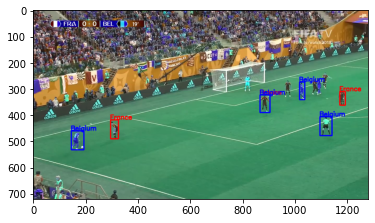

In [50]:
plt.imshow(image)